In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/'
!ls

/content/drive/My Drive
'Big Data'			    Lincode		     Reference_Books
'BigData Testing Notes.odt.saved'   My_Creation_for_Github   Seq2Seq
'Getting started.pdf'		   'Programming Hive.pdf'


In [ ]:
# Imports

import os, sys

from keras.models import Model
from keras.layers import Input, LSTM, GRU, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import spacy
import numpy as np
import pandas as pd
from numpy import array
from numpy import asarray
from numpy import zeros
import random
import re
import math
import time
from sklearn.model_selection import train_test_split

In [ ]:
!pip install Unidecode

     |████████████████████████████████| 245kB 6.6MB/s 


In [ ]:
BATCH_SIZE = 64
EPOCHS = 20
LSTM_NODES =256
NUM_SENTENCES = 15000
MAX_SENTENCE_LENGTH = 50
MAX_NUM_WORDS = 15000
EMBEDDING_SIZE = 300

# Data Cleansing

In [ ]:
# replacing contraction words

contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am",'i\'m':'i am', "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", 'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization'}

In [ ]:
# dealing with spl characters
punct = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';',  '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√','∞','θ','÷','α','•','à','−','β','∅','³','π','‘','₹','´','°','™','√²','—–' ]

In [ ]:
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

In [ ]:
missplet_dict = {'didnt':'did not',
 "i'm": 'i am',
 'doesnt' : 'does not',
 'isnt' : 'is not',
 'upvote' : 'up vote',
 'wasnt' : 'was not',
 'remindme': 'remind me',
 'lt3' : 'love',
 'upvotes' : 'up votes',
 'shouldnt' : 'should not',
 'hasnt' : 'has not',
 'downvoted' : 'down voted',
 'howd' : ' how do you do',
 'upvoted' : 'up voted',
 'rcasualconversation' : 'casual conversation',
 'cakeday' : 'cake day',
 'downvote' : 'down vote',
 'whatre' : 'what are',
 'contenderwhat' : 'contender what',
 'downvotes' : 'down votes',
 'heshe' : 'he she',
 'tldr' : 'too long did not read',
 'ftfy' : 'Fixed That For You',
 'wbu' : 'what about you',
 'thatd' : 'that would',
 'welp' : 'well',
 'ikr' : 'i know right',
 'realise' : 'realize',
 'thatll' : 'that will',
 'upvoting' : 'up voting',
 'whatd' : ' what did',
 'grey': 'gray',
 'yesno' : 'yes no',
 'flavour' : 'flavor',
 'tooslowly' : 'too slowly',
 'realised' : 'realized',
 'learnt' : 'learn',
 'answers—comment' :  'answers comment',
 'gorillaz' : 'gorilla',
 '“fuck' : 'fuck',
 'accomplishedbeen' : 'accomplished been',
 'whyd' : 'why did',
 'edm' : 'electronic dance music',
 'linkin' : 'linking',
 'hbu' : 'how about you',
 'mustve' : 'must have',
 'whered' : 'where did',
 'continuein' : 'continuing',
 'welldo' : 'well done',
 'downvoter' : 'down voter',
 'friendo' : 'friend',
 '“fixed' : 'fixed',
 'yknow' : 'you know',
 'programme' : 'program',
 'heya' : 'hi',
 'neighbours' : 'neighbor',
 'hmu' : 'hit me up',
 'twinsies' : 'twins',
 '“what' : 'what',
 'inb4' : 'in before',
 'halflife' : 'half life',
 'heyy' : 'hey',
 'summarise' : 'summarize',
 'lpt' : 'life pro tip',
 'gofundme' : 'go find me',
 '5yearold' : '5 year old',
 'noyou' : 'no you',
 'yesyou' : 'yes you',
 'life".' : 'life',
 'yess' : 'yes',
 'greys' : 'gray',
 'daynight' : 'day night',
 'yessss' : 'yes',
 'trickortreating' : 'trick or treat',
 'ninenine' : 'nine nine',
 'dnd' : 'do not disturb',
 'howre' : 'how are',
 'highfive' : 'high five',
 'favour' : 'favor',
 'gtfo' : 'Get the fuck out',
 'necessarythey' : 'necessary they',
 'yessssss' : 'yes',
 'jaja' : 'haha',
 'stopdinner' : 'stop dinner',
 'wristbander' :  'wrist bander',
 'tf2' : 'team fortress',
 'ptsd' : 'post traumatic stress disorder',
 'whataburger' : 'what a burger',
 'youi' : 'you i',
 'nosleep' : 'no sleep',
 'warframe' : 'war frame',
 'what?*' : 'what',
 'yoooo' : 'yes',
 'lul' : 'love you lots',
 'pmed' : 'private messaged',
 ':&gt' : 'get through',
 'pmd' : 'private messaged',
 'ahahah' : 'haha',
 'rsuddenlygay' : 'suddenly gay',
 'rsuicidebywords' : 'suicide by words',
 'rmadlads' :'mad lads',
 '“oh' : 'oh',
 'i‘m' : 'i am',
 'raww' : 'raw',
 'clickbait' : 'click bait',
 'rshowerthoughts' : 'shower thoughts',
 'ymmv' : 'your mileage may vary',
 'imnsho' : 'in my not so humble opinion',
 'shittttt' : 'shit',
 'holllyyyyyyy' : 'holy',
 'foxygen' : 'oxygen',
 'rteenagers' : 'teenagers',
 'gotchu' : 'got you',
 'boredwho' : 'bored who',
 'gt;: ' : 'get through',
 'coldplay' : 'cold play',
 'crosspost' : 'cross post',
 ' #tellyourstoryin5words' : 'tell your story in 5 words',
 'isare' : 'is are',
 'sfw' : 'safe for work',
 'downvoting' :  'down voting',
 'rpointlessstories' : 'pointless stories',
 'now?!' : 'now',
 'apologise' : 'apologize',
 '“they' : 'they',
 'enough’.' : 'enough',
 'goodcool' : 'good cool',
 'gtgt': 'got to go to',
 '‘not' : 'not',
 'upvoter' : 'up voter',
 'breathtakingyour' :  'breath taking our',
 'runexpectedoffice' : 'unexpected office',
 'leavingbi' : 'leaving',
 'rfoundthemobileuser' : 'found the mobile user',
 'thanksif' : 'thanks if',
 'rwholesome' : 'wholesome',
 'lol' : 'laugh out loud',
 'rlounge' : 'lounge',
 'soundcloud' : 'sound cloud',
 'leppard' : 'leopard',
 'rtotallynotrobots' : 'totally not robots',
 'cavetown' : 'cave town',
 'blinddisabled' : 'blind disabled',
 'introverting' : 'introvert',
 'lmaoooo' : 'laughing my ass off',
 'yh' : 'yes',
 'sucks!"america' : 'sucks america',
 'fawlty' : 'faulty',
 'runpopularopinion' : 'run popular opinion',
 'yesssss' : 'yes',
 'crossdress' : 'cross dress',
 'adminsemployees' : 'admins employees',
 'smokedis' : 'smoke',
 'spelt' : 'spell',
 '“far' : 'far',
 'dayweekmonth' : 'day week month',
 'thicc' : 'thick',
 'yaaay' : 'yes',
 'suckswhats' : 'sucks what',
 'durnk' : 'drunk',
 'butterfinger' : 'butter finger',
 'tekken' : 'taken',
 'yayyyy' : 'yes',
 'recall': 'recall',
 'lotr' : 'lord of the rings',
 'mhm' : 'yes',
 'travelled' : 'travel',
 'lolyou' : 'laugh out loud you',
 'rlifeprotips' : 'life pro tips',
 'itwhat' : 'it what',
 'rwallstreetbets' : 'wall street bets',
 'sharptooth' : 'sharp tooth',
 'vsauce' : 'sauce',
 'yayyy' : 'yes',
 'casualconversation' : 'casual conversation',
 'world war 2' : 'world war 2',
 'hiiii' : 'hi',
 'no3' : 'no',
 'selfie' : 'selfie',
 'dreamworks' : 'dream works',
 'bf4' : 'before',
 'hej' : 'hi',
 'flavoured' : 'flavored',
 'daaamn' : 'damn',
 'son' : 'son',
 'you' : 'you',
 'gay".' : 'gay',
 'nword' : 'word',
 'rthedavincicode' : 'the vinci code',
 'brexit' : 'brexit',
 'midtwenties' : 'mid twenties',
 'bingewatch' : 'binge watch',
 'peel”.' : 'peel',
 'yourselfwell' : 'yourself well',
 'yppah' : 'yes',
 'rbisexual' : 'bisexual',
 'kindda' : 'kind of',
 'runderratedcomments' : 'underrated comments',
 'backmaybe' : 'back may be',
 'itbut' : 'it but',
 'suggestionsi' : 'suggestions',
 'motherfuckerglad' : 'mother fucker glad',
 'nvm' : 'never mind',
 'songshelp' : 'songs help',
 'positivityfun' : 'positivity fun',
 'indoorone' : 'indore one',
 'timehow' : 'time how',
 'lolbut' : 'laugh out loud but',
 'manwoman' : 'man woman',
 'feelingdoing' : 'feeling doing',
 'friendscould' : 'friends cloud',
 'rhappyrelationships' : 'happy relationships',
 'do. Lonely' : 'do lonely',
 'realisation' : 'realization',
 'woooow' : 'wow',
 'rcatsstandingup' : 'cats standing up',
 'goldenboye' : 'golden boy',
 'weeki' : 'week',
 'numbah' : 'number',
 'yeahh' : 'yes',
 'youim' : 'you i am',
 'toowhat' : 'too what',
 'deffinetly' : 'definitely',
 'game3' : 'game',
 'xpost' : 'post',
 'rchildfree' : 'child free',
 'music2' : 'music',
 'quotebook' : 'quote book',
 'ufuckswithducks' : 'fuck with duck',
 'lold' : 'old',
 'whaaaaat' : 'what',
 'flavours' : 'flavors',
 'rpics' : 'pictures',
 'piano2' : 'piano',
 'requirementsi' : 'requirements',
 'himher' : 'him her',
 'yeaaah' : 'yes',
 'rsuicidewatch' : 'suicide watch',
 'damnnnn' : 'damn',
 'longsword' : 'long word',
 'awfuli' : 'awefully',
 'humour' : 'humor',
 'fooddrink' : 'food drink',
 'hby' : 'how about you',
 'roomwhat' : 'room what',
 'selfies' : 'selfie',
 'feelsbadman' : 'feels bad man',
 'youuu' : 'you',
 'mustnt' : 'must not',
 'nederlands' : 'netherlands',
 'aaaaand' : 'and',
 'smoll' : 'small',
 'yus' : 'yes',
 'madlad' : 'mad lad',
 'rniceguys' : 'nice guys',
 'uyourearealcunt' : ' you are a real cunt',
 'rimsorryjon' : 'i am sorry jon',
 'yet."' : 'yet',
 'edit😬' : 'edit',
 'retreival' : 'retrieval',
 'haaaaate' : 'hate',
 'musicianband' : 'musician band',
 'wingies' : 'wings',
 'money4' : 'money',
 'work2' : 'work',
 'goodi' : 'good',
 'touchstarved' : 'touch starved',
 'grindr' : 'grinder',
 'rblunderyears' : 'blunder years',
 'rcursedcomments' : 'cursed comments',
 '‘em' : 'them',
 'rstaticsnake' : 'static snake',
 'marcy' : 'mercy',
 'mightve' : 'might have',
 'cuteits' : 'cute',
 'whatim' : 'what i am',
 'havingfun' : 'having fun',
 'exwifes' : 'ex wives',
 'noyoure' : 'no you are',
 'aaaaand' : 'and',
 'smoll' : 'small',
 'yus' : 'yes',
 "i'hv": "i have",
 "i'll": "i will",
 '☺️':'😊',
 'ampx###b': 'amp bitch',"i've": 'i have','rwholesomememes':'wholesome memes',
 'hello😀😊☺🙌👍':'hello 😀 😊','͜ʖ': '😊', '😂😂':'😂','😂😂😂':'😂','ayyyy':'yes','\U0001f970':'😊', '🅱️ailure' : 'big failure', "goin'": 'going','👉😎👉': '😎', "d'aww" : 'so cute','ulionghost': ' you lion ghost',"fuckin'": 'fucking', 'uiwinalot7': ' you i win a lot', 'goodra': 'good',
'pie5': 'being soft', '😀😊☺': '😀', 'uwaterguy##': ' you water guy', ' rseriousconversation': 'serious conversation','runexpectedfactorial':'unexpected factorial', "i'mma": 'i am',
'👏👏':'👏', "lol'd": "laughed out loud", 'ಠಠ': '😎', 'rtea': 'tea', '🤣🤣🤣': '🤣','👏👏👏':'👏',"you'": 'you', "d'aw": 'so cute', 'pmmeyogurtpics':'send me yogurt pictures',
"sirma'am": 'sir madam','rusernamechecksout': 'user name checks out', 'lt3lt3lt3': 'love', 'bookmovie': 'book movie', '😀😊☺🤗😇': '😀 😊 🤗 😇',
'rpopping': 'popping','gt##': 'got to go', 'rwoooosh': 'woooosh', 'rr4r': 'redditor for redditor','ustaticsnake': 'you static snake','eli5':'explain in simple words',
'mrbeast': 'beast', 'rkarmaroulette':'karma roulette','😭😭':'😭','️\U0001f9e1💛💚💙💜':'love','🤔🤔🤔':'🤔','rgatekeeping':'gate keeping', 'moviestv': 'movie television','dinozo':'dinosaur', 'scarn': 'mayhem',
'\U0001f9e1💛💚💙💜': 'love', "pm'd":'messaged','ayyye':'yes', '\U0001f92a':'😀', 'gtno': 'get the fuck out', "walkin'": 'walking', 'rknightsofpineapple':'knights of pineapple',
'##what': 'what','rbrandnewsentence':'brand new sentence', 'bhosadiwale':'son of a bitch', 'runexpectedthanos': 'unexpected thanos',"'murica": 'america',
'udonaldduck':'you donald duck','rjobs':'jobs' ,'uitsthesnake': 'it is the snake','💕💕': '💕'}

Pre-processing functions

In [ ]:
def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else mapping[t.lower()] if t.lower() in mapping else t for t in text.split(" ")])
    return text

In [ ]:
def clean_special_chars(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, '')
    
    specials = {'\u200b': ' ', '…': ' ', '\ufeff': ''}  # to be updated again upon checking the coverage
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

In [ ]:
def remove_newlines(sent):
  sent = re.sub(r'\s+', " ", sent )
  return sent

In [ ]:
def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
        #x = re.sub('[0-9]', '#', x)
    return x

In [ ]:
def clean_missplets(text, mapping):
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

Data Loading


In [ ]:
# fetching data from csv file to dataframe
reddit = pd.read_csv('/content/drive/My Drive/Seq2Seq/casual_data_windows.csv')

In [ ]:
reddit.head(2)

,Unnamed: 0,0,1,2
0,0,What kind of phone(s) do you guys have?,I have a pixel. It's pretty great. Much better...,Does it really charge all the way in 15 min?
1,1,I have a pixel. It's pretty great. Much better...,Does it really charge all the way in 15 min?,"Pretty fast. I've never timed it, but it's und..."


In [ ]:
# creating an empty dataframe to hold consecutive conversation-pairs
df_conv = pd.DataFrame(columns=['sent1', 'sent2'])

In [ ]:
# filling the dataframe with conversation pairs from reddit dataframe
for index, row in reddit.iterrows():
    df_conv = df_conv.append({'sent1':row["0"],'sent2':row["1"]},ignore_index=True)
    df_conv = df_conv.append({'sent1':row["1"],'sent2':row["2"]},ignore_index=True)

Data cleansing activities


In [ ]:
df_conv['sent1'] = df_conv['sent1'].apply(lambda x: clean_contractions(x, contraction_mapping))
df_conv['sent2'] = df_conv['sent2'].apply(lambda x: clean_contractions(x, contraction_mapping))

In [ ]:
df_conv['sent1'] = df_conv['sent1'].apply(lambda x: clean_special_chars(x, punct, punct_mapping))
df_conv['sent2'] = df_conv['sent2'].apply(lambda x: clean_special_chars(x, punct, punct_mapping))

In [ ]:
df_conv['sent1'] = df_conv['sent1'].apply(lambda x: clean_contractions(x, contraction_mapping))
df_conv['sent2'] = df_conv['sent2'].apply(lambda x: clean_contractions(x, contraction_mapping))

In [ ]:
df_conv['sent1'] = df_conv['sent1'].apply(lambda x : x.lower())
df_conv['sent2'] = df_conv['sent2'].apply(lambda x : x.lower())

In [ ]:
df_conv['sent1'] = df_conv['sent1'].apply(lambda x : remove_newlines(x))
df_conv['sent2'] = df_conv['sent2'].apply(lambda x : remove_newlines(x))

In [ ]:
df_conv['sent1'] = df_conv['sent1'].apply(lambda x: clean_numbers(x))
df_conv['sent2'] = df_conv['sent2'].apply(lambda x: clean_numbers(x))

In [ ]:
df_conv['sent1'] = df_conv['sent1'].apply(lambda x: clean_numbers(x))
df_conv['sent2'] = df_conv['sent2'].apply(lambda x: clean_numbers(x))

In [ ]:
df_conv['sent1'] = df_conv['sent1'].apply(lambda x: clean_missplets(x, missplet_dict))
df_conv['sent2'] = df_conv['sent2'].apply(lambda x: clean_missplets(x, missplet_dict))

In [ ]:
print(df_conv.shape)
df_conv.head()

(112594, 2)


,sent1,sent2
0,what kind of phones do you guys have,i have a pixel it is pretty great much better ...
1,i have a pixel it is pretty great much better ...,does it really charge all the way in ## min
2,i have a pixel it is pretty great much better ...,does it really charge all the way in ## min
3,does it really charge all the way in ## min,pretty fast i have never timed it but it is un...
4,does it really charge all the way in ## min,pretty fast i have never timed it but it is un...


In [ ]:
duplicateRowsDF = df_conv[df_conv.duplicated()]

In [ ]:
# removing duplicate rows
df_conv = df_conv.drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
print(df_conv.shape)
df_conv.head()

(71052, 2)


,sent1,sent2
0,what kind of phones do you guys have,i have a pixel it is pretty great much better ...
1,i have a pixel it is pretty great much better ...,does it really charge all the way in ## min
3,does it really charge all the way in ## min,pretty fast i have never timed it but it is un...
5,pretty fast i have never timed it but it is un...,cool i have been thinking of getting one my ph...
6,what kind of phones do you guys have,samsung galaxy j1 it is my first cell phone an...


In [ ]:
#output_sentence = output + ' <eos>'
#output_sentence_input = '<sos> ' + output

In [ ]:
input_sentences = []
output_sentences = []
output_sentences_inputs = []

In [ ]:
count = 0
for line in df_conv['sent1'].values:
    count += 1

    if count > NUM_SENTENCES:
        break

    input_sentence = line

    input_sentences.append(input_sentence)

print("num samples input:", len(input_sentences))

num samples input: 15000


In [ ]:
count = 0
for line in df_conv['sent2'].values:
    count += 1

    if count > NUM_SENTENCES:
        break

    output = line

    output_sentence = output + ' <eos>'
    output_sentence_input = '<sos> ' + output

    output_sentences.append(output_sentence)
    output_sentences_inputs.append(output_sentence_input)

print("num samples output:", len(output_sentences))
print("num samples output input:", len(output_sentences_inputs))

num samples output: 15000
num samples output input: 15000


In [ ]:
print(input_sentences[0])
print(output_sentences[0])
print(output_sentences_inputs[0])

what kind of phones do you guys have
i have a pixel it is pretty great much better than what i had before  <eos>
<sos> i have a pixel it is pretty great much better than what i had before 


# Tokenisation and Padding

In [ ]:
input_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
input_tokenizer.fit_on_texts(input_sentences)
input_integer_seq = input_tokenizer.texts_to_sequences(input_sentences)

word2idx_inputs = input_tokenizer.word_index
print('Total unique words in the input: %s' % len(word2idx_inputs))

max_input_len = max(len(sen) for sen in input_integer_seq)
print("Length of longest sentence in input: %g" % max_input_len)

Total unique words in the input: 9586
Length of longest sentence in input: 54


In [ ]:
output_tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, filters='')
output_tokenizer.fit_on_texts(output_sentences + output_sentences_inputs)
output_integer_seq = output_tokenizer.texts_to_sequences(output_sentences)
output_input_integer_seq = output_tokenizer.texts_to_sequences(output_sentences_inputs)

word2idx_outputs = output_tokenizer.word_index
print('Total unique words in the output: %s' % len(word2idx_outputs))

num_words_output = len(word2idx_outputs) + 1
max_out_len = max(len(sen) for sen in output_integer_seq)
print("Length of longest sentence in the output: %g" % max_out_len)

Total unique words in the output: 11141
Length of longest sentence in the output: 26


In [ ]:
# Padding
# Padding is being applied to the beginning of encoder inputs

encoder_input_sequences = pad_sequences(input_integer_seq, maxlen=max_input_len)
print("encoder_input_sequences.shape:", encoder_input_sequences.shape)
print("encoder_input_sequences[0]:", encoder_input_sequences[172])

encoder_input_sequences.shape: (15000, 54)
encoder_input_sequences[0]: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  85  67  73   3  59  12 237 651   9  32 368]


In [ ]:
# Padding is being applied to the end of decoder inputs as every decoder input should start with '<sos>' token

decoder_input_sequences = pad_sequences(output_input_integer_seq, maxlen=max_out_len, padding='post')
print("decoder_input_sequences.shape:", decoder_input_sequences.shape)
print("decoder_input_sequences[172]:", decoder_input_sequences[172])

decoder_input_sequences.shape: (15000, 26)
decoder_input_sequences[172]: [  2   3  16  85  20   6 179   6 411 253  12   6 165 391   0   0   0   0
   0   0   0   0   0   0   0   0]


In [ ]:
# Verifying corresponding numeric values for tokens

print(word2idx_inputs["name"])
print(word2idx_inputs["model"])
print(word2idx_outputs["<sos>"])
print(word2idx_outputs["<eos>"])

182
4407
2
1


# Word Embedding

In [ ]:
# Creating word embedding using glove pretrained word embeddings

embeddings_dictionary = dict()

glove_file = open(r'/content/drive/My Drive/Seq2Seq/glove.6B.300d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

Creating a matrix where the row number represents the integer value for the word and the columns will correspond to the dimensions of the word.

This matrix will contain the word embeddings for the words in our input sentences

In [ ]:
num_words = min(MAX_NUM_WORDS, len(word2idx_inputs) + 1)
embedding_matrix = zeros((num_words, EMBEDDING_SIZE))
for word, index in word2idx_inputs.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
print(embeddings_dictionary["word"])

[-4.3036e-01 -4.0622e-01 -1.8279e-01 -1.2548e-01  4.3490e-02 -2.1216e-01
 -3.6509e-01  3.2598e-02 -1.0828e-01 -1.3537e+00 -1.9152e-01  1.8976e-01
 -4.3755e-01  2.4337e-01  2.9676e-01 -4.2886e-02 -4.9444e-02  3.7994e-01
  5.5679e-02  1.0740e-01 -1.5195e-01  2.7901e-03 -5.0005e-02  1.6948e-01
 -1.7819e-01 -1.7449e-01  1.8066e-01 -3.5179e-01  4.3839e-01  2.3936e-01
 -1.2200e-01 -1.3631e-02 -2.7989e-01  4.4950e-01 -6.5760e-01 -7.7317e-02
  6.9246e-02 -7.7499e-01 -4.3509e-01  1.6177e-01 -9.4878e-02  2.5968e-01
 -3.6336e-02  2.0131e-01  1.6860e-01 -4.3616e-01 -2.1700e-02  6.6751e-02
 -3.5336e-01  3.5581e-01  4.3044e-01 -1.2607e-01  9.4664e-01  2.5349e-01
 -6.7874e-01  1.0727e-01  1.1090e-01 -2.2619e-02  5.4648e-01  6.4194e-01
  7.1169e-01  4.4902e-02  1.0753e-01  4.5971e-01 -4.1282e-02  2.1160e-01
  3.2395e-01  1.9663e-01  4.1871e-01  3.7204e-01  4.2732e-02 -1.6376e-01
 -1.3316e-01  6.7047e-02 -1.2618e-01 -6.9014e-02  1.0433e+00  2.7489e-01
 -8.0330e-03 -1.7116e-01  4.8991e-02  3.0116e-02 -1

In [ ]:
# Creating the embedding layer for the input:

embedding_layer = Embedding(num_words, EMBEDDING_SIZE, weights=[embedding_matrix], input_length=max_input_len)

# Model building

In [ ]:
# Expected shape of the final output will be:
# (number of inputs, length of the output sentence, the number of words in the output)

In [ ]:
# Creating empty output array:

decoder_targets_one_hot = np.zeros((
        len(input_sentences),
        max_out_len,
        num_words_output
    ),
    dtype='float32'
)

In [ ]:
decoder_targets_one_hot.shape

(15000, 26, 11142)

To make predictions, the final layer of the model will be a dense layer, therefore we need the outputs in the form of one-hot encoded vectors, since we will be using softmax activation function at the dense layer. To create such one-hot encoded output, the next step is to assign 1 to the column number that corresponds to the integer representation of the word.

In [ ]:
decoder_output_sequences = pad_sequences(output_integer_seq, maxlen=max_out_len, padding='post')

In [ ]:
for i, d in enumerate(decoder_output_sequences):
    for t, word in enumerate(d):
        decoder_targets_one_hot[i, t, word] = 1

In [ ]:
# The following script defines the encoder:

encoder_inputs_placeholder = Input(shape=(max_input_len,))
x = embedding_layer(encoder_inputs_placeholder)
encoder = LSTM(LSTM_NODES, return_state=True)

encoder_outputs, h, c = encoder(x)
encoder_states = [h, c]

In [ ]:
# Creating decoder LSTM:

decoder_inputs_placeholder = Input(shape=(max_out_len,))

decoder_embedding = Embedding(num_words_output, LSTM_NODES)
decoder_inputs_x = decoder_embedding(decoder_inputs_placeholder)

decoder_lstm = LSTM(LSTM_NODES, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)

In [ ]:
# Final output layer:

decoder_dense = Dense(num_words_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
# Compile the model:

model = Model([encoder_inputs_placeholder,
  decoder_inputs_placeholder], decoder_outputs)
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

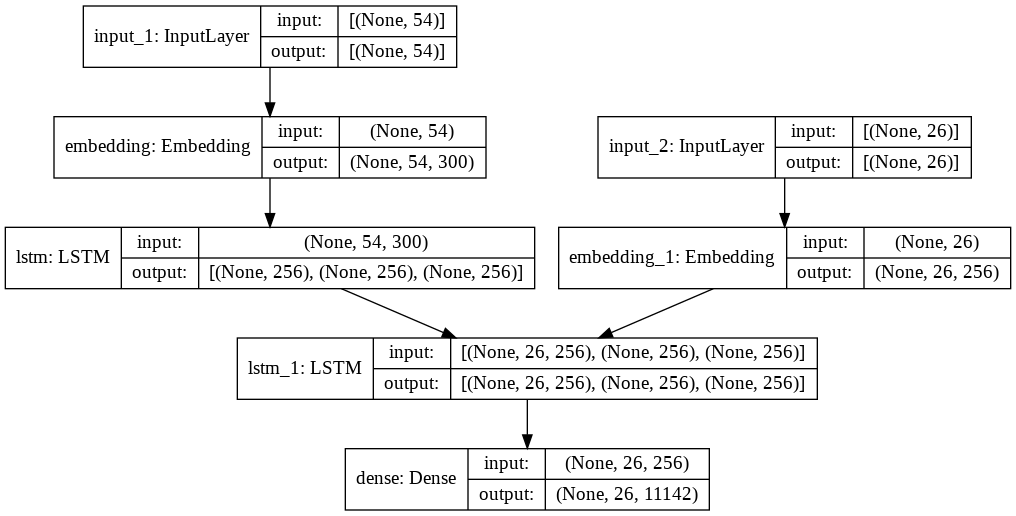

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Training the model:

r = model.fit(
    [encoder_input_sequences, decoder_input_sequences],
    decoder_targets_one_hot,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=0.1,
)

Epoch 1/20
211/211 [==============================] - 75s 339ms/step - loss: 3.0331 - accuracy: 0.6577 - val_loss: 2.1259 - val_accuracy: 0.6989
Epoch 2/20
211/211 [==============================] - 71s 339ms/step - loss: 1.9844 - accuracy: 0.7134 - val_loss: 2.0284 - val_accuracy: 0.7112
Epoch 3/20
211/211 [==============================] - 71s 335ms/step - loss: 1.8786 - accuracy: 0.7244 - val_loss: 1.9767 - val_accuracy: 0.7163
Epoch 4/20
211/211 [==============================] - 72s 340ms/step - loss: 1.8141 - accuracy: 0.7295 - val_loss: 1.9489 - val_accuracy: 0.7187
Epoch 5/20
211/211 [==============================] - 72s 339ms/step - loss: 1.7651 - accuracy: 0.7325 - val_loss: 1.9335 - val_accuracy: 0.7186
Epoch 6/20
211/211 [==============================] - 70s 333ms/step - loss: 1.7185 - accuracy: 0.7346 - val_loss: 1.9248 - val_accuracy: 0.7208
Epoch 7/20
211/211 [==============================] - 70s 332ms/step - loss: 1.6678 - accuracy: 0.7388 - val_loss: 1.9189 - val_ac

NOTE : Although the size of the unique words in the vocabulary was more than 40,000, I have to limit the word count to 15,000 due to the restriction with RAM size

# Modifying Model for Prediction

1. During training the input to the decoder and output from the decoder is known and the model is trained on the basis of these inputs and outputs.

2. During predictions the next word will be predicted on the basis of the previous word, which in turn is also predicted in the previous time-step.

3. However, the functionality of the encoder remains the same always. The input sentence is passed through the encoder and the hidden state, and the cell state is the output from the encoder.

In [ ]:
encoder_model = Model(encoder_inputs_placeholder, encoder_states)  # the encoder model remains same

In [ ]:
# Since now at each step we need the decoder hidden and cell states,
# we will modify our model to accept the hidden and cell states as shown below:

decoder_state_input_h = Input(shape=(LSTM_NODES,))
decoder_state_input_c = Input(shape=(LSTM_NODES,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

In [ ]:
# Now at each time step, there will be only single word in the decoder input, 
# we need to modify the decoder embedding layer as follows:

decoder_inputs_single = Input(shape=(1,))
decoder_inputs_single_x = decoder_embedding(decoder_inputs_single)

In [ ]:
# Next, we need to create the placeholder for decoder outputs:

decoder_outputs, h, c = decoder_lstm(decoder_inputs_single_x, initial_state=decoder_states_inputs)

In [ ]:
# To make predictions, the decoder output is passed through the dense layer:

decoder_states = [h, c]
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
# The final step is to define the updated decoder model, as shown here:

decoder_model = Model(
    [decoder_inputs_single] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)


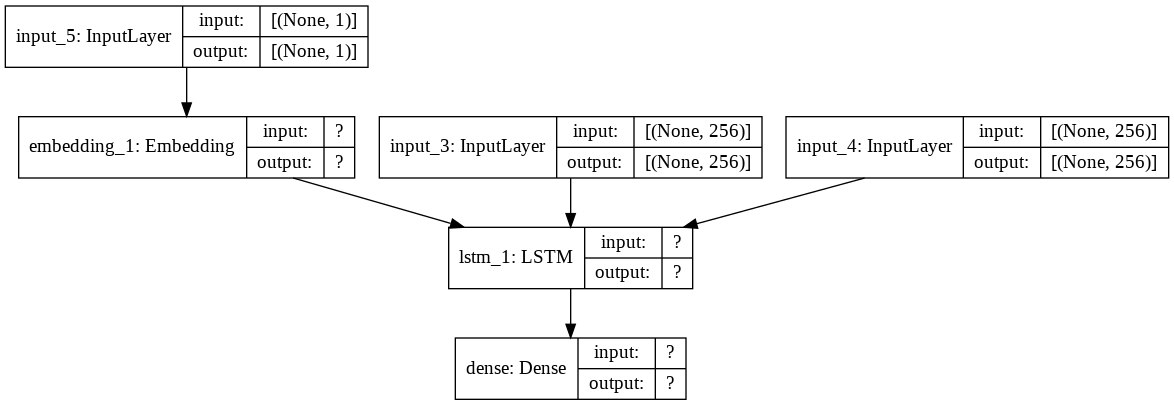

In [ ]:
from keras.utils import plot_model
plot_model(decoder_model, to_file='model_plot_dec.png', show_shapes=True, show_layer_names=True)

# Making Predictions

In [ ]:
# Creating new dictionaries for both inputs and outputs where the 
# keys will be the integers and the corresponding values will be the words.

idx2word_input = {v:k for k, v in word2idx_inputs.items()}
idx2word_target = {v:k for k, v in word2idx_outputs.items()}


In [ ]:
# The following method will accept an input-padded sequence input sentence (in the integer form)
# and will return the response sentence

def generate_response(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = word2idx_outputs['<sos>']
    eos = word2idx_outputs['<eos>']
    output_sentence = []

    for _ in range(max_out_len):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        idx = np.argmax(output_tokens[0, 0, :])

        if eos == idx:
            break

        word = ''

        if idx > 0:
            word = idx2word_target[idx]
            output_sentence.append(word)

        target_seq[0, 0] = idx
        states_value = [h, c]

    return ' '.join(output_sentence)


# Testing the Model

In [ ]:
i = np.random.choice(len(input_sentences))
input_seq = encoder_input_sequences[i:i+1]
response = generate_response(input_seq)
print('-')
print('Input:', input_sentences[i])
print('Response:', response)

-
Input: probably a fish and chips 
Response: i love that
